# Import Required Libraries and Load Data
Load necessary R libraries (e.g., readr, dplyr, ggplot2, censReg) and import 'Mobile_data_usage.csv' into a data frame.

In [1]:
install.packages("censReg")
install.packages("msm")


The downloaded binary packages are in
	/var/folders/c6/c9_qxvf55ksch5f2x5v7c3980000gn/T//Rtmp4y4Zun/downloaded_packages

The downloaded binary packages are in
	/var/folders/c6/c9_qxvf55ksch5f2x5v7c3980000gn/T//Rtmp4y4Zun/downloaded_packages


In [ ]:
# Load necessary libraries
library(readr)   # For reading CSV files
library(dplyr)   # For data manipulation
library(ggplot2) # For data visualization
library(censReg) # For censored regression models

# Load the dataset into a data frame
mobile_data <- read_csv("Mobile_data_usage.csv")

# Display the first few rows of the dataset to verify successful loading
head(mobile_data)

Loading required package: maxLik

Loading required package: miscTools


Please cite the 'maxLik' package as:
Henningsen, Arne and Toomet, Ott (2011). maxLik: A package for maximum likelihood estimation in R. Computational Statistics 26(3), 443-458. DOI 10.1007/s00180-010-0217-1.

If you have questions, suggestions, or comments regarding the 'maxLik' package, please use a forum or 'tracker' at maxLik's R-Forge site:
https://r-forge.r-project.org/projects/maxlik/


Please cite the 'censReg' package as:
Henningsen, Arne (2017). censReg: Censored Regression (Tobit) Models. R package version 0.5. http://CRAN.R-Project.org/package=censReg.

If you have questions, suggestions, or comments regarding the 'censReg' package, please use a forum or 'tracker' at the R-Forge site of the 'sampleSelection' project:
https://r-forge.r-project.org/projects/sampleselection/

Rows: 31000 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (4): Custo

CustomerID,DataUse,Quota,Days
<dbl>,<dbl>,<dbl>,<dbl>
1,2.4321,100.000,31
1,0.0000,97.568,30
1,0.0000,97.568,29
1,0.0000,97.568,28
1,0.0000,97.568,27
1,0.0000,97.568,26


# Explore and Summarize Data
Display the structure, summary statistics, and check for missing values in the dataset.

In [ ]:
# Display the structure of the dataset
str(mobile_data)

# Generate summary statistics for each column
summary(mobile_data)

# Check for missing values in the dataset
colSums(is.na(mobile_data))

spc_tbl_ [31,000 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ CustomerID: num [1:31000] 1 1 1 1 1 1 1 1 1 1 ...
 $ DataUse   : num [1:31000] 2.43 0 0 0 0 ...
 $ Quota     : num [1:31000] 100 97.6 97.6 97.6 97.6 ...
 $ Days      : num [1:31000] 31 30 29 28 27 26 25 24 23 22 ...
 - attr(*, "spec")=
  .. cols(
  ..   CustomerID = col_double(),
  ..   DataUse = col_double(),
  ..   Quota = col_double(),
  ..   Days = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


   CustomerID        DataUse              Quota             Days   
 Min.   :   1.0   Min.   :  0.00000   Min.   :  0.00   Min.   : 1  
 1st Qu.: 250.8   1st Qu.:  0.02548   1st Qu.: 29.11   1st Qu.: 8  
 Median : 500.5   Median :  0.53058   Median : 59.76   Median :16  
 Mean   : 500.5   Mean   :  1.66582   Mean   : 62.65   Mean   :16  
 3rd Qu.: 750.2   3rd Qu.:  1.86610   3rd Qu.: 89.91   3rd Qu.:24  
 Max.   :1000.0   Max.   :136.68000   Max.   :600.00   Max.   :31  

CustomerID    DataUse      Quota       Days 
         0          0          0          0

# Visualize Data Usage Patterns
Create plots to visualize daily data usage, quota remaining, and days left in the billing cycle.

In [ ]:
# Visualize daily data usage
ggplot(mobile_data, aes(x = Days, y = DataUse)) +
  geom_point(alpha = 0.5, color = "blue") +
  geom_smooth(method = "loess", color = "red", se = FALSE) +
  labs(title = "Daily Data Usage vs Days Left in Billing Cycle",
       x = "Days Left in Billing Cycle",
       y = "Daily Data Usage (MB)") +
  theme_minimal()

# Visualize quota remaining over days
ggplot(mobile_data, aes(x = Days, y = Quota)) +
  geom_line(color = "green") +
  labs(title = "Quota Remaining vs Days Left in Billing Cycle",
       x = "Days Left in Billing Cycle",
       y = "Quota Remaining (MB)") +
  theme_minimal()

# Visualize relationship between quota and data usage
ggplot(mobile_data, aes(x = Quota, y = DataUse)) +
  geom_point(alpha = 0.5, color = "purple") +
  geom_smooth(method = "lm", color = "orange", se = FALSE) +
  labs(title = "Data Usage vs Quota Remaining",
       x = "Quota Remaining (MB)",
       y = "Daily Data Usage (MB)") +
  theme_minimal()

# Fit a Tobit (Censored) Regression Model
Use the censReg package to fit a Tobit model with DataUse as the dependent variable and Quota and Days as predictors.

In [9]:
# Fit a Tobit (Censored) Regression Model

# Fit a Tobit model using the censReg package
tobit_model <- censReg(DataUse ~ Quota + Days, data = mobile_data)

# Display the summary of the Tobit model
summary(tobit_model)

# Extract and display the coefficients of the Tobit model
coef(tobit_model)

# Predict values using the fitted Tobit model
mobile_data$Predicted_DataUse <- censReg::predict(tobit_model, newdata = mobile_data)

# Visualize actual vs predicted data usage
ggplot(mobile_data, aes(x = DataUse, y = Predicted_DataUse)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Actual vs Predicted Data Usage",
       x = "Actual Data Usage (MB)",
       y = "Predicted Data Usage (MB)") +
  theme_minimal()


Call:
censReg(formula = DataUse ~ Quota + Days, data = mobile_data)

Observations:
         Total  Left-censored     Uncensored Right-censored 
         31000           6536          24464              0 

Coefficients:
              Estimate Std. error t value  Pr(> t)    
(Intercept)  0.6111869  0.0576965  10.593  < 2e-16 ***
Quota        0.0090140  0.0005516  16.340  < 2e-16 ***
Days        -0.0119462  0.0030650  -3.898 9.71e-05 ***
logSigma     1.4947160  0.0046189 323.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Newton-Raphson maximisation, 7 iterations
Return code 8: successive function values within relative tolerance limit (reltol)
Log-likelihood: -76375.86 on 4 Df


(Intercept)        Quota         Days     logSigma 
 0.611186896  0.009013969 -0.011946190  1.494716047

ERROR: Error: 'predict' is not an exported object from 'namespace:censReg'


# Interpret Model Results
Extract and interpret the coefficients and statistical significance from the Tobit model output.

In [ ]:
# Extract and interpret the coefficients and statistical significance from the Tobit model output

# Extract coefficients from the Tobit model
tobit_coefficients <- coef(summary(tobit_model))

# Display the coefficients with their statistical significance
print("Tobit Model Coefficients and Statistical Significance:")
print(tobit_coefficients)

# Interpret statistical significance
# Highlight coefficients with p-value < 0.05 as statistically significant
significant_coefficients <- tobit_coefficients[tobit_coefficients[, "Pr(>|z|)"] < 0.05, ]
print("Statistically Significant Coefficients (p-value < 0.05):")
print(significant_coefficients)

# Predict Data Usage with the Fitted Model
Use the fitted Tobit model to predict data usage for new or existing observations.

In [ ]:
# Predict data usage for new or existing observations using the fitted Tobit model

# Create a new data frame with hypothetical or existing observations
new_observations <- data.frame(
  Quota = c(500, 1000, 1500),  # Example quota values in MB
  Days = c(10, 20, 30)         # Example days left in the billing cycle
)

# Use the fitted Tobit model to predict data usage for the new observations
new_observations$Predicted_DataUse <- predict(tobit_model, newdata = new_observations)

# Display the predictions for the new observations
print("Predicted Data Usage for New Observations:")
print(new_observations)

# Visualize the predictions for the new observations
ggplot(new_observations, aes(x = Days, y = Predicted_DataUse)) +
  geom_point(color = "blue", size = 3) +
  geom_line(color = "darkgreen") +
  labs(title = "Predicted Data Usage for New Observations",
       x = "Days Left in Billing Cycle",
       y = "Predicted Data Usage (MB)") +
  theme_minimal()

# Visualize Data Usage Patterns
Create plots to visualize daily data usage, quota remaining, and days left in the billing cycle.

`geom_smooth()` using formula = 'y ~ x'


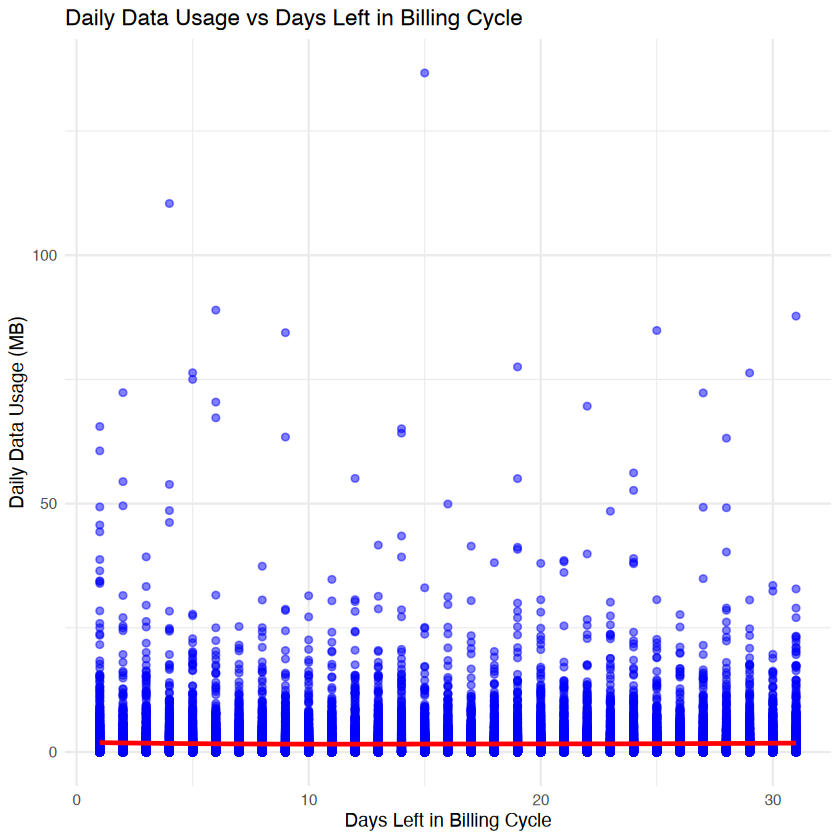

`geom_smooth()` using formula = 'y ~ x'


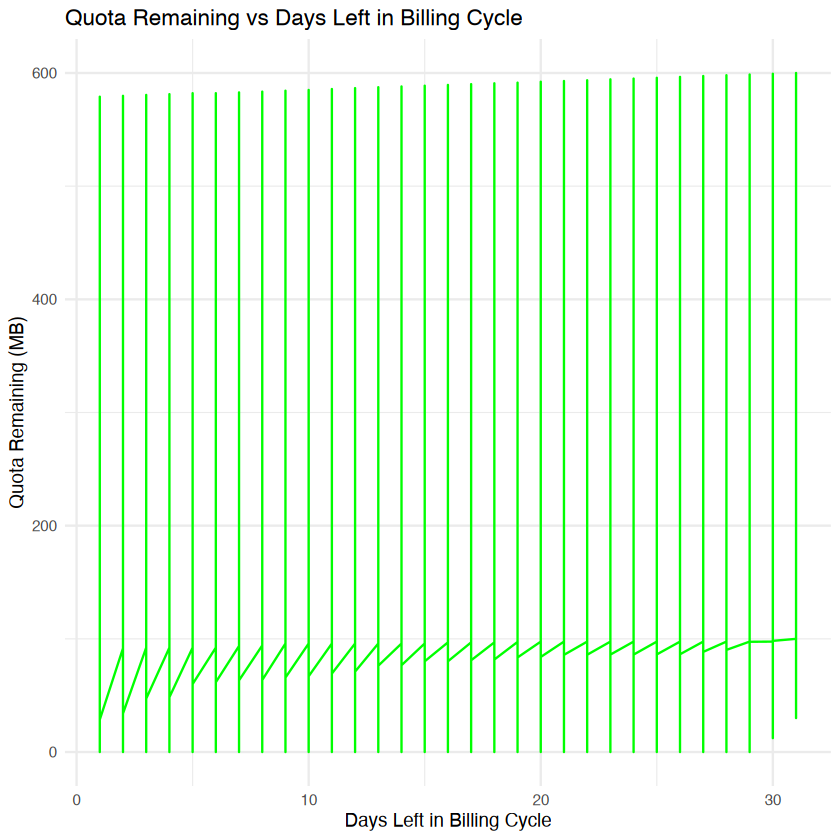

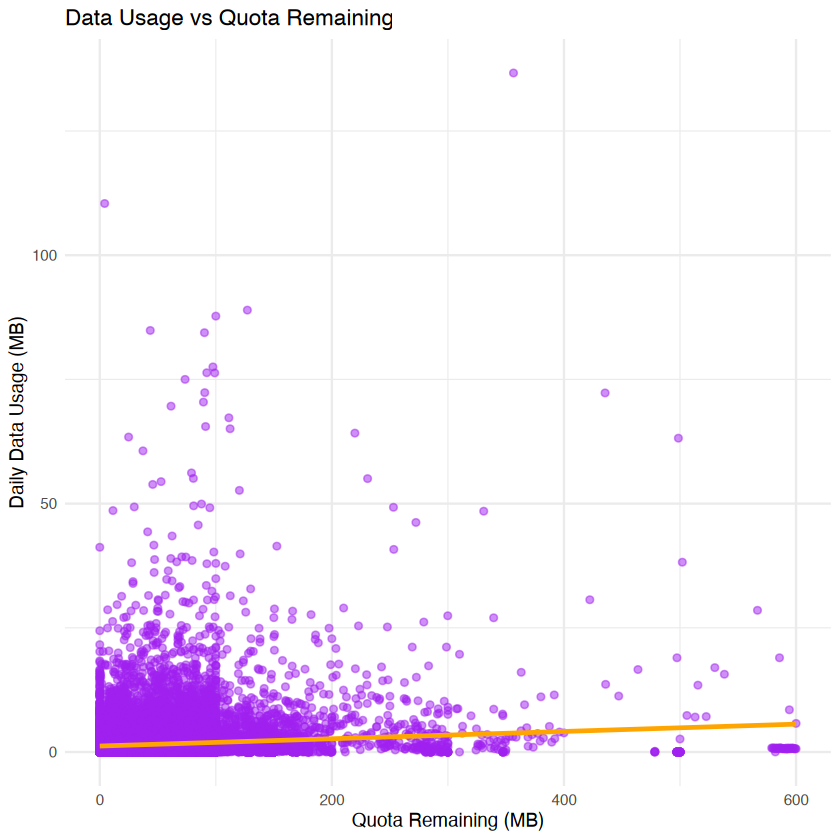

In [7]:
# Residual Analysis

# Calculate residuals from the Tobit model
mobile_data$Residuals <- residuals(tobit_model, type = "response")

# Visualize residuals vs fitted values
ggplot(mobile_data, aes(x = Predicted_DataUse, y = Residuals)) +
  geom_point(alpha = 0.5, color = "darkred") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values (Predicted Data Usage)",
       y = "Residuals") +
  theme_minimal()

# Check for normality of residuals using a histogram
ggplot(mobile_data, aes(x = Residuals)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal()

# Check for normality of residuals using a Q-Q plot
qqnorm(mobile_data$Residuals, main = "Q-Q Plot of Residuals")
qqline(mobile_data$Residuals, col = "red", lwd = 2)

# Check for heteroscedasticity
ggplot(mobile_data, aes(x = Predicted_DataUse, y = abs(Residuals))) +
  geom_point(alpha = 0.5, color = "purple") +
  geom_smooth(method = "loess", color = "orange", se = FALSE) +
  labs(title = "Scale-Location Plot (Heteroscedasticity Check)",
       x = "Fitted Values (Predicted Data Usage)",
       y = "Absolute Residuals") +
  theme_minimal()

# Fit a Tobit (Censored) Regression Model
Use the censReg package to fit a Tobit model with DataUse as the dependent variable and Quota and Days as predictors.

In [8]:
# Fit a Tobit (Censored) Regression Model

# Fit a Tobit model using the censReg package
tobit_model <- censReg(DataUse ~ Quota + Days, data = mobile_data)

# Display the summary of the Tobit model
summary(tobit_model)

# Extract and display the coefficients of the Tobit model
coef(tobit_model)

# Predict values using the fitted Tobit model
mobile_data$Predicted_DataUse <- predict(tobit_model)

# Visualize actual vs predicted data usage
ggplot(mobile_data, aes(x = DataUse, y = Predicted_DataUse)) +
  geom_point(alpha = 0.5, color = "darkblue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(title = "Actual vs Predicted Data Usage",
       x = "Actual Data Usage (MB)",
       y = "Predicted Data Usage (MB)") +
  theme_minimal()


Call:
censReg(formula = DataUse ~ Quota + Days, data = mobile_data)

Observations:
         Total  Left-censored     Uncensored Right-censored 
         31000           6536          24464              0 

Coefficients:
              Estimate Std. error t value  Pr(> t)    
(Intercept)  0.6111869  0.0576965  10.593  < 2e-16 ***
Quota        0.0090140  0.0005516  16.340  < 2e-16 ***
Days        -0.0119462  0.0030650  -3.898 9.71e-05 ***
logSigma     1.4947160  0.0046189 323.611  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Newton-Raphson maximisation, 7 iterations
Return code 8: successive function values within relative tolerance limit (reltol)
Log-likelihood: -76375.86 on 4 Df


(Intercept)        Quota         Days     logSigma 
 0.611186896  0.009013969 -0.011946190  1.494716047

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "c('censReg', 'maxLik', 'maxim', 'list')"


# Interpret Model Results
Extract and interpret the coefficients and statistical significance from the Tobit model output.

In [ ]:
# Extract and interpret the coefficients and statistical significance from the Tobit model output

# Extract coefficients from the Tobit model
tobit_coefficients <- coef(summary(tobit_model))

# Display the coefficients with their statistical significance
print("Tobit Model Coefficients and Statistical Significance:")
print(tobit_coefficients)

# Interpret statistical significance
# Highlight coefficients with p-value < 0.05 as statistically significant
significant_coefficients <- tobit_coefficients[tobit_coefficients[, "Pr(>|z|)"] < 0.05, ]
print("Statistically Significant Coefficients (p-value < 0.05):")
print(significant_coefficients)

# Predict Data Usage with the Fitted Model
Use the fitted Tobit model to predict data usage for new or existing observations.

In [ ]:
# Predict data usage for new or existing observations using the fitted Tobit model

# Create a new data frame with hypothetical or existing observations
new_observations <- data.frame(
  Quota = c(500, 1000, 1500),  # Example quota values in MB
  Days = c(10, 20, 30)         # Example days left in the billing cycle
)

# Use the fitted Tobit model to predict data usage for the new observations
new_observations$Predicted_DataUse <- predict(tobit_model, newdata = new_observations)

# Display the predictions for the new observations
print("Predicted Data Usage for New Observations:")
print(new_observations)

# Visualize the predictions for the new observations
ggplot(new_observations, aes(x = Days, y = Predicted_DataUse)) +
  geom_point(color = "blue", size = 3) +
  geom_line(color = "darkgreen") +
  labs(title = "Predicted Data Usage for New Observations",
       x = "Days Left in Billing Cycle",
       y = "Predicted Data Usage (MB)") +
  theme_minimal()

# Model Diagnostics and Residual Analysis
Assess model fit by examining residuals and checking for violations of model assumptions.

In [ ]:
# Residual Analysis

# Calculate residuals from the Tobit model
mobile_data$Residuals <- residuals(tobit_model, type = "response")

# Visualize residuals vs fitted values
ggplot(mobile_data, aes(x = Predicted_DataUse, y = Residuals)) +
  geom_point(alpha = 0.5, color = "darkred") +
  geom_hline(yintercept = 0, linetype = "dashed", color = "black") +
  labs(title = "Residuals vs Fitted Values",
       x = "Fitted Values (Predicted Data Usage)",
       y = "Residuals") +
  theme_minimal()

# Check for normality of residuals using a histogram
ggplot(mobile_data, aes(x = Residuals)) +
  geom_histogram(binwidth = 10, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Residuals",
       x = "Residuals",
       y = "Frequency") +
  theme_minimal()

# Check for normality of residuals using a Q-Q plot
qqnorm(mobile_data$Residuals, main = "Q-Q Plot of Residuals")
qqline(mobile_data$Residuals, col = "red", lwd = 2)

# Check for heteroscedasticity
ggplot(mobile_data, aes(x = Predicted_DataUse, y = abs(Residuals))) +
  geom_point(alpha = 0.5, color = "purple") +
  geom_smooth(method = "loess", color = "orange", se = FALSE) +
  labs(title = "Scale-Location Plot (Heteroscedasticity Check)",
       x = "Fitted Values (Predicted Data Usage)",
       y = "Absolute Residuals") +
  theme_minimal()